# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [4]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

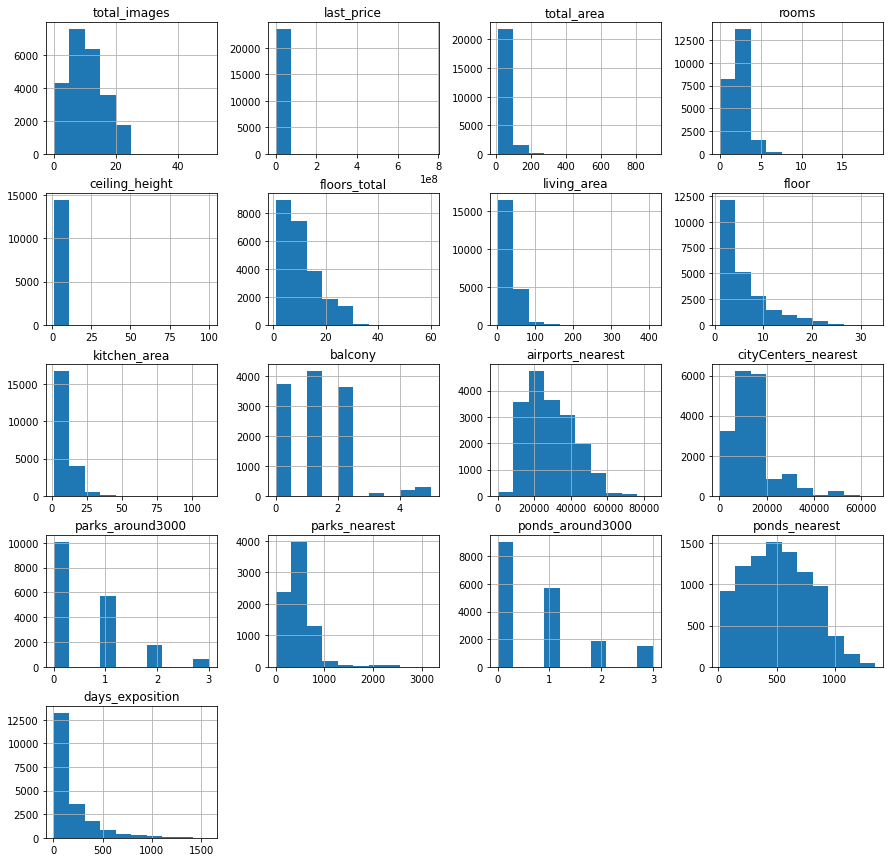

In [6]:
df.hist(figsize=(15, 15));

- В данных наблюдается большое количество пропусков в картографических данных.
- Также присутствуют пропуски в тех столбцах, которые заполняются вручную (например, 'balcony', 'is_apartment', 'ceiling_height').
- Столбцы 'first_day_exposition', 'is_apartment' и 'balcony' имеют неверный формат данных.

### Предобработка данных

#### Заполнение пропусков в данных.

In [7]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [8]:
rows = df['ceiling_height'] > 20
df.loc[rows, 'ceiling_height'] /= 10

In [9]:
rows = df['ceiling_height'] <= 2
df.loc[rows, 'ceiling_height'] *= 10

Пропуски в столбце 'ceiling_height' заполняем медианным значением.

In [10]:
rows = df['ceiling_height'].isna()
df.loc[rows, 'ceiling_height'] = df['ceiling_height'].median()

In [11]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.709335
std          0.479811
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max         20.000000
Name: ceiling_height, dtype: float64

Пропуски в столбце 'balcony' заполняем нулями и преобразуем его к типу int.

Со столбцом 'is_apartment' поступаем также и преобразуем его к типу bool.

In [12]:
df['balcony'] = df['balcony'].fillna(0).astype(int)
df['balcony'].isna().sum()

0

In [13]:
df['is_apartment'] = df['is_apartment'].fillna(0).astype(bool)
df['is_apartment'].isna().sum()

0

#### Преобразование типов данных.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Столбец 'first_day_exposition' логично будет привести к типу datetime.

In [19]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y%m%dT')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

#### Устранение дубликатов.

In [20]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Создаем новый столбец 'locality_only_name', в котором будут содержаться только названия населенных пунктов.

In [21]:
df['locality_only_name'] = df['locality_name'].str.replace('поселок', 'посёлок')

df = df.replace({'locality_only_name': {
    'городской посёлок': 'посёлок',
    'коттеджный посёлок': 'посёлок',
    'посёлок городского типа имени': 'ПГТ имени',
    'Кингисеппский': 'Кингисепп',
    'Коммунары': 'Коммунар',
}}, regex=True)

df['locality_only_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'ПГТ имени Морозова',
       'ПГТ имени Свердлова', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяг

In [22]:
replace_vals = ['городской посёлок', 'посёлок городского типа', 'посёлок при железнодорожной станции',
               'посёлок станции', 'посёлок', 'село', 'деревня', 'садовое товарищество',
               'садоводческое некоммерческое товарищество']

for val in replace_vals:
    df['locality_only_name'] = df['locality_only_name'].str.replace(val, '')
    
df['locality_only_name'] = df['locality_only_name'].str.strip()

df['locality_only_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жил', 'Жилгородок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара', 'Ильи

#### Устранение редких и выбивающихся значений.

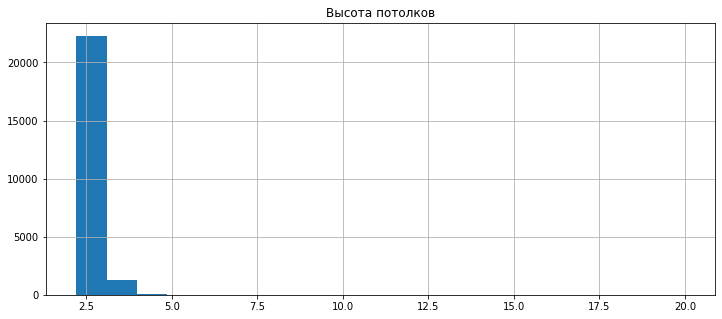

In [23]:
plt.title('Высота потолков')
df['ceiling_height'].hist(bins=20, figsize=(12, 5));
plt.show()

На гистограмме видно, что данных с высотой потолков больше 4.5 метров практически нет. Можно от них избавиться.

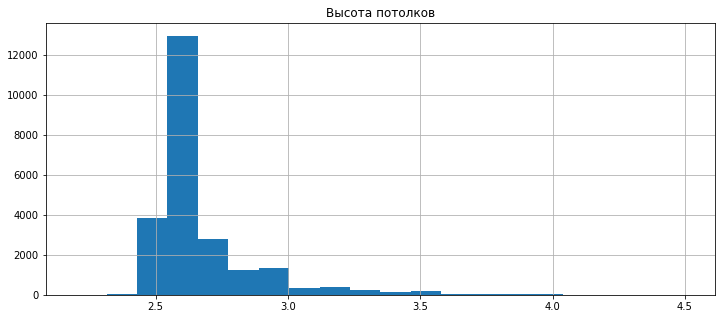

In [24]:
df = df.query('ceiling_height <= 4.5')

plt.title('Высота потолков')
df['ceiling_height'].hist(bins=20, figsize=(12, 5));
plt.show()

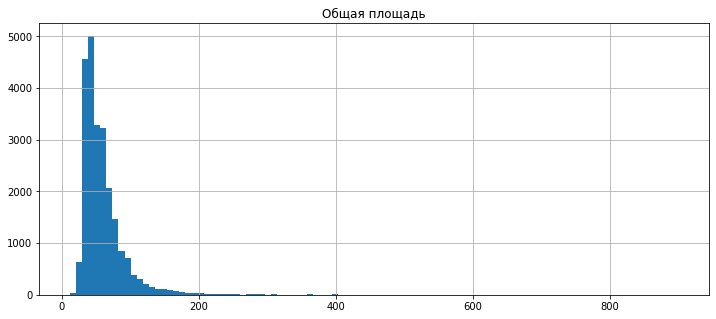

In [25]:
plt.title('Общая площадь')
df['total_area'].hist(bins=100, figsize=(12, 5));
plt.show()

Гистограмма показывает, что значений общей площади (столбец 'total_area') больше 250 практически нет, значит можно удалить такие значения.

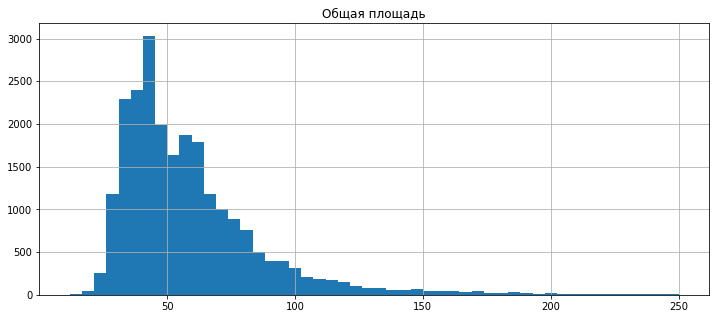

In [26]:
df = df.query('total_area <= 250')

plt.title('Общая площадь')
df['total_area'].hist(bins=50, figsize=(12, 5));
plt.show()

In [27]:
df['locality_only_name'].value_counts().head(30)

Санкт-Петербург    15596
Мурино               590
Кудрово              471
Шушары               440
Всеволожск           397
Пушкин               367
Колпино              337
Парголово            327
Гатчина              307
Выборг               235
Петергоф             201
Сестрорецк           183
Красное Село         176
Новое Девяткино      144
Сертолово            142
Ломоносов            133
Кириши               125
Бугры                114
Сланцы               112
Волхов               111
Кингисепп            106
Тосно                103
Кронштадт             96
Никольское            94
Коммунар              90
Сосновый Бор          86
Кировск               84
Отрадное              80
Янино-1               68
Приозерск             66
Name: locality_only_name, dtype: int64

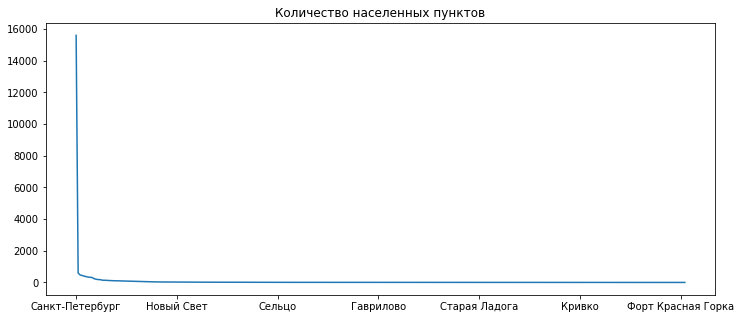

In [28]:
plt.title('Количество населенных пунктов')
df['locality_only_name'].value_counts().plot(figsize=(12, 5));
plt.show()

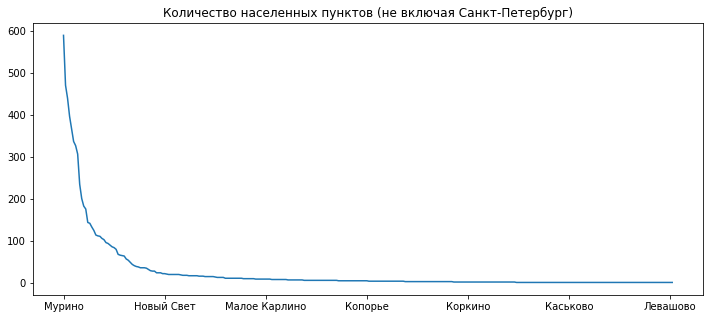

In [29]:
plt.title('Количество населенных пунктов (не включая Санкт-Петербург)')
(df.query('locality_only_name != "Санкт-Петербург"')['locality_only_name'].value_counts()
 .plot(figsize=(12, 5)));
plt.show()

На графике видно, что основная часть данных в столбце 'locality_only_name' находится в диапазоне от 100 и больше. Следовательно, можно избавиться от значений, которые меньше 100. 

In [30]:
true_locs = df['locality_only_name'].value_counts()
true_locs = true_locs[true_locs > 100]
true_locs

Санкт-Петербург    15596
Мурино               590
Кудрово              471
Шушары               440
Всеволожск           397
Пушкин               367
Колпино              337
Парголово            327
Гатчина              307
Выборг               235
Петергоф             201
Сестрорецк           183
Красное Село         176
Новое Девяткино      144
Сертолово            142
Ломоносов            133
Кириши               125
Бугры                114
Сланцы               112
Волхов               111
Кингисепп            106
Тосно                103
Name: locality_only_name, dtype: int64

In [31]:
df = df.query('locality_only_name in @true_locs.index')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20717 entries, 0 to 23697
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20717 non-null  int64         
 1   last_price            20717 non-null  float64       
 2   total_area            20717 non-null  float64       
 3   first_day_exposition  20717 non-null  datetime64[ns]
 4   rooms                 20717 non-null  int64         
 5   ceiling_height        20717 non-null  float64       
 6   floors_total          20637 non-null  float64       
 7   living_area           19134 non-null  float64       
 8   floor                 20717 non-null  int64         
 9   is_apartment          20717 non-null  bool          
 10  studio                20717 non-null  bool          
 11  open_plan             20717 non-null  bool          
 12  kitchen_area          18781 non-null  float64       
 13  balcony         

#### Заполнение пропусков (продолжение).

В столбцах 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000' и 'ponds_nearest' имеет смысл заполнять пропуски медианным значением в зависимости от населенного пункта. Чтобы не дублироваать код, создадим функцию fill_median.

In [32]:
def fill_median(column_name):
    for name in df['locality_only_name'].unique():
        row = ((df['locality_only_name'] == name) & (df[column_name].isna()), column_name)
        df.loc[row] = df.loc[(df['locality_only_name'] == name), column_name].median()

Пропуски в столбце 'floors_total' заполним медианным значением в зависимости от населенного пункта.

In [33]:
fill_median('floors_total')
df['floors_total'].isna().sum()

0

### Посчитайте и добавьте в таблицу новые столбцы

Цена за квадратный метр.

In [34]:
df['price_per_meter'] = df['last_price'] / df['total_area']
df['price_per_meter']

0        120370.370370
1         82920.792079
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23691    129903.978052
23693     73717.948718
23694     72490.845228
23695     52542.372881
23697    149511.400651
Name: price_per_meter, Length: 20717, dtype: float64

День недели подачи объявления о продаже.

In [35]:
df['day_public_exp'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df['day_public_exp'].value_counts()

3    3737
1    3678
4    3516
2    3472
0    3174
5    1668
6    1472
Name: day_public_exp, dtype: int64

Месяц подачи объявления.

In [36]:
df['month_public_exp'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['month_public_exp'].value_counts()

2     2279
3     2208
4     2119
11    2092
10    1860
9     1736
8     1543
6     1533
7     1503
12    1402
1     1312
5     1130
Name: month_public_exp, dtype: int64

Год подачи объявления.

In [37]:
df['year_public_exp'] = pd.DatetimeIndex(df['first_day_exposition']).year
df['year_public_exp'].value_counts()

2018    7338
2017    7228
2019    2517
2016    2459
2015    1053
2014     122
Name: year_public_exp, dtype: int64

Добавим столбец 'floor_type', в котором будет содержаться информация о типе этажа квартиры.

In [38]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    
    elif row['floor'] == row['floors_total']:
        return 'последний'
    
    return 'другой'

In [39]:
df['floor_type'] = df.apply(floor_type, axis=1)
df['floor_type'].value_counts()

другой       15769
последний     2646
первый        2302
Name: floor_type, dtype: int64

Преобразуем расстояние до центра города в км и запишем в новый столбец 'cityCenters_nearest_km'.

In [40]:
df['cityCenters_nearest_km'] = (df['cityCenters_nearest'] / 1000).round(0)
df['cityCenters_nearest_km'].value_counts()

12.0    1600
15.0    1564
13.0    1456
14.0    1275
16.0    1265
11.0    1174
17.0     908
5.0      892
10.0     716
4.0      677
6.0      596
9.0      593
8.0      590
7.0      412
18.0     379
19.0     359
3.0      344
2.0      304
31.0     286
22.0     220
30.0     214
1.0      184
34.0     177
21.0     164
29.0     132
20.0     120
33.0     117
32.0     117
26.0     117
23.0      98
24.0      93
35.0      88
25.0      73
27.0      71
28.0      64
52.0      54
36.0      34
51.0      27
0.0       26
50.0      25
53.0      17
49.0      17
40.0      16
37.0      13
41.0       9
42.0       6
48.0       5
43.0       2
39.0       2
61.0       1
60.0       1
Name: cityCenters_nearest_km, dtype: int64

### Проведите исследовательский анализ данных

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20717 entries, 0 to 23697
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            20717 non-null  int64         
 1   last_price              20717 non-null  float64       
 2   total_area              20717 non-null  float64       
 3   first_day_exposition    20717 non-null  datetime64[ns]
 4   rooms                   20717 non-null  int64         
 5   ceiling_height          20717 non-null  float64       
 6   floors_total            20717 non-null  float64       
 7   living_area             19134 non-null  float64       
 8   floor                   20717 non-null  int64         
 9   is_apartment            20717 non-null  bool          
 10  studio                  20717 non-null  bool          
 11  open_plan               20717 non-null  bool          
 12  kitchen_area            18781 non-null  float6

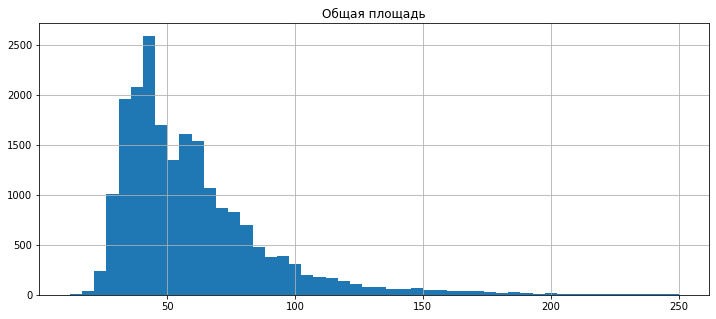

In [42]:
plt.title('Общая площадь')
df['total_area'].hist(bins=50, figsize=(12, 5));
plt.show()

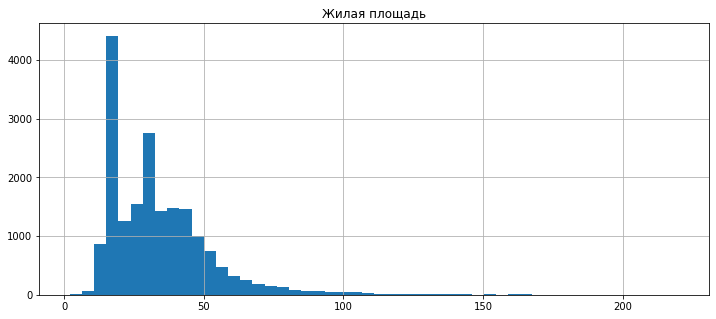

In [43]:
plt.title('Жилая площадь')
df['living_area'].hist(bins=50, figsize=(12, 5));
plt.show()

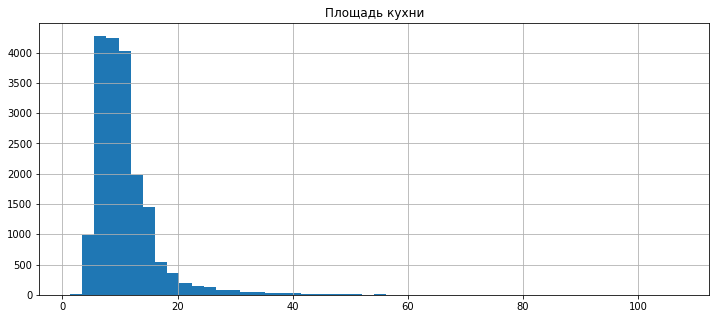

In [44]:
plt.title('Площадь кухни')
df['kitchen_area'].hist(bins=50, figsize=(12, 5));
plt.show()

In [45]:
df['last_price'] /= 1000000

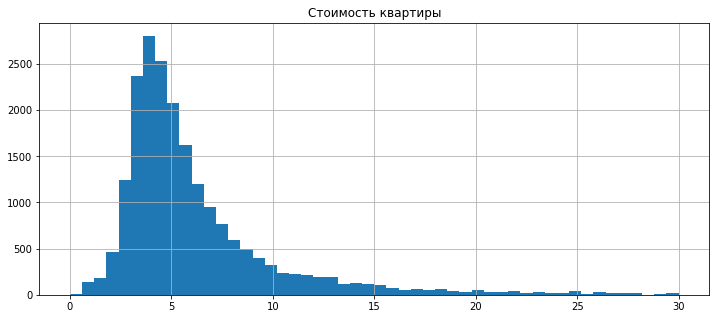

In [46]:
plt.title('Стоимость квартиры')
df['last_price'].hist(bins=50, range=(0, 30), figsize=(12, 5));
plt.show()

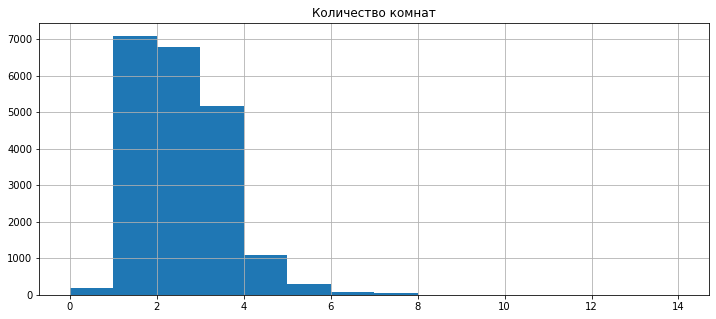

In [47]:
plt.title('Количество комнат')
df['rooms'].hist(bins=14, figsize=(12, 5));
plt.show()

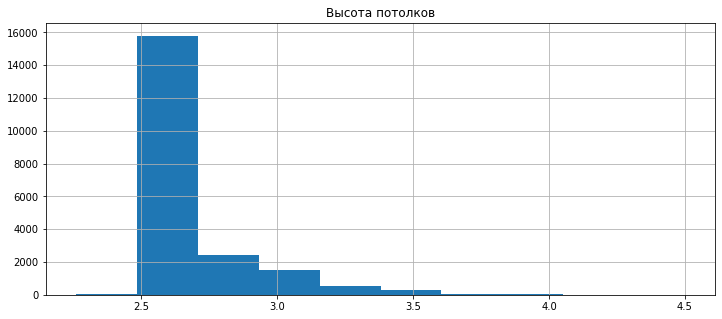

In [48]:
plt.title('Высота потолков')
df['ceiling_height'].hist(figsize=(12, 5));
plt.show()

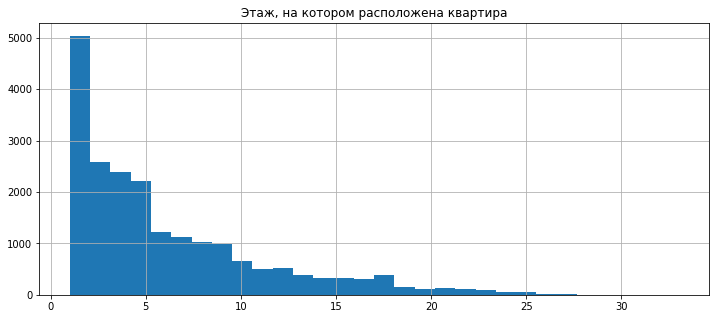

In [49]:
plt.title('Этаж, на котором расположена квартира')
df['floor'].hist(bins=30, figsize=(12, 5));
plt.show()

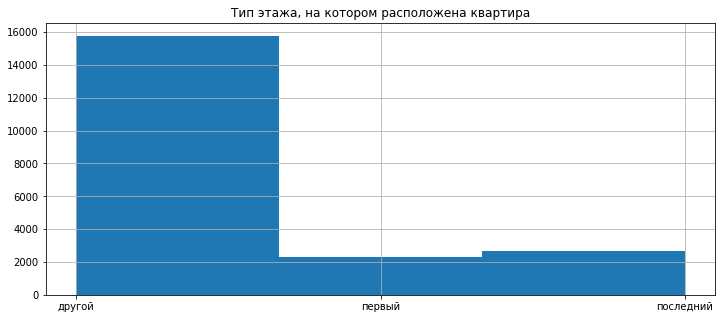

In [50]:
plt.title('Тип этажа, на котором расположена квартира')
df['floor_type'].hist(bins=3, figsize=(12, 5));
plt.show()

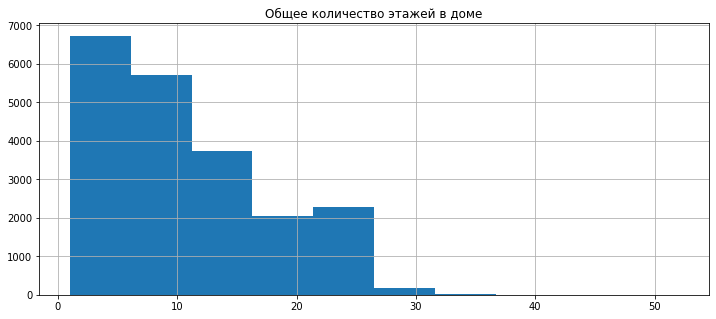

In [51]:
plt.title('Общее количество этажей в доме')
df['floors_total'].hist(figsize=(12, 5));
plt.show()

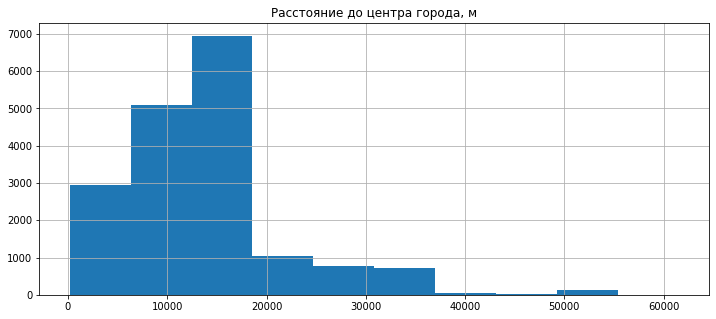

In [52]:
plt.title('Расстояние до центра города, м')
df['cityCenters_nearest'].hist(figsize=(12, 5));
plt.show()

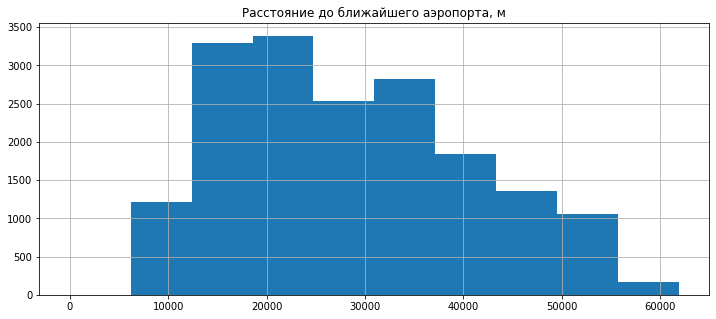

In [53]:
plt.title('Расстояние до ближайшего аэропорта, м')
df['airports_nearest'].hist(figsize=(12, 5));
plt.show()

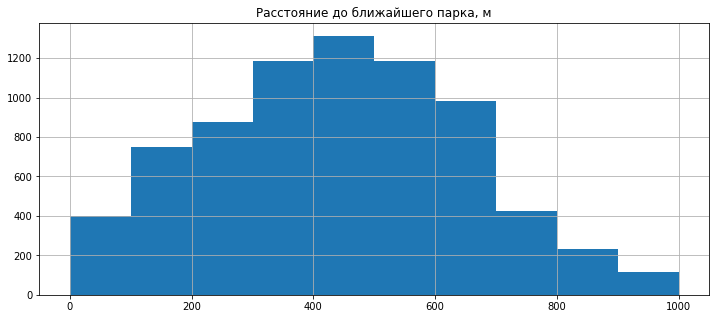

In [54]:
plt.title('Расстояние до ближайшего парка, м')
df['parks_nearest'].hist(range=(0, 1000), figsize=(12, 5));
plt.show()

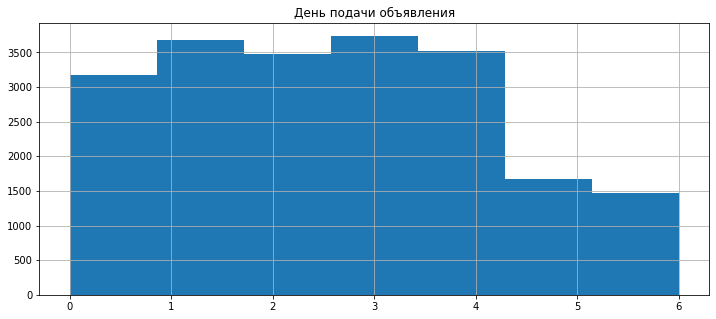

In [55]:
plt.title('День подачи объявления')
df['day_public_exp'].hist(bins=7, figsize=(12, 5));
plt.show()

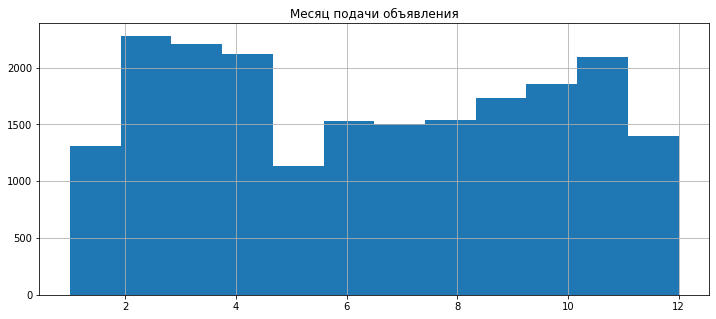

In [56]:
plt.title('Месяц подачи объявления')
df['month_public_exp'].hist(bins=12, figsize=(12, 5));
plt.show()

- Наибольшее количество квартир продается с общей площадью 35-40. Также можно наблюдать провал на графике в зоне средних значений (50-60). В остальном график похож на нормальное распределение.
- На графике с жилой площадью можно заметить провал в зоне между 25 и 30. Скорее всего это связано с пропусками в данных. График также близок к нормальному распределению.
- В большинстве квартир площадь кухни равна 9-10 квадратам. График - нормальное распределение; на него  в меньшей степени повлияли пропущенные значения.
- Большинство квартир продаются по цене 4-4.5 млн. График - нормальное распределение.
- В основном выставлены на продажу одно- и двухкомнатные квартиры. Немногим меньше - трехкомнатных. Остальные в значительно меньшем количестве.
- В подавляющем большинстве квартир стандартная высота потолков - 2.6-2.7 метров. Остальные варианты представлены в значительно меньшем количестве.
- Чаще всего продают квартиры на этажах, не являющихся первым и последним. На первых и последних этажах квартиры представлены примерно в одинаковом количестве.
- Больше всего продают квартиры в домах с этажностью до 10 этажей. Также в значительно меньшем количестве представлены квартиры в домах, с количеством этажей до 25. Все остальные - очень редки.
- Большое количество квартир продаются не далее 15 км от центра города. Присутствует также немалая часть квартир, которые находятся в центре города, либо близко к нему. Квартиры за городом представлены в очень малых количествах.
- По близости к аэропорту выставлены на продажу квартиры на расстоянии 15-35 км.
- В подавляющем большинстве объявлений квартиры расположены не далее 450-500 м от парка. В остальном - график является нормальным распределением.
- Наибольшее количество объявлений выставляются в течение рабочей недели (с понедельника по пятницу). В выходные количество объявлений снижается в 2 раза.
- Больше всего объявлений о продаже квартир было выставлено в начале и конце года (2, 3, 4, 9, 10, 11 месяцы). Май был самым "неурожайным" на объявления. Во все остальные месяцы - примерно одинаковое количество.

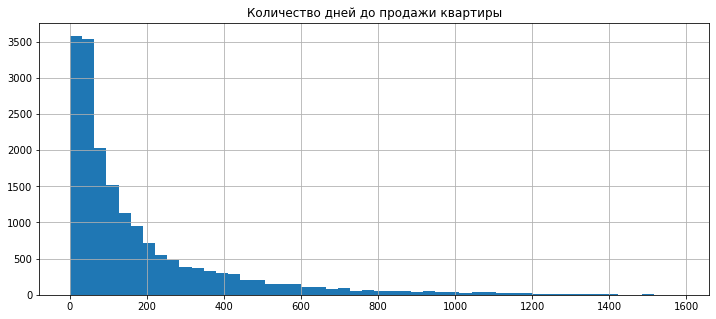

In [57]:
plt.title('Количество дней до продажи квартиры')
df['days_exposition'].hist(bins=50, figsize=(12, 5));
plt.show()

In [58]:
df['days_exposition'].median()

94.0

In [59]:
df['days_exposition'].mean()

179.46449115044248

- В среднем квартира продается чуть меньше, чем за полгода (179.5 дней).
- По гистограмме видно, что большинство квартир было продано в течение трех месяцев (95 дней).
- Присутствуют также квартиры, которые были проданы меньше, чем за месяц. Такие продажи можно считать быстрыми.
- БОльшая часть квартир продается в течение года, однако есть небольшая часть, которые продавались больше года. Такие продажи можно назвать необычно долгими.

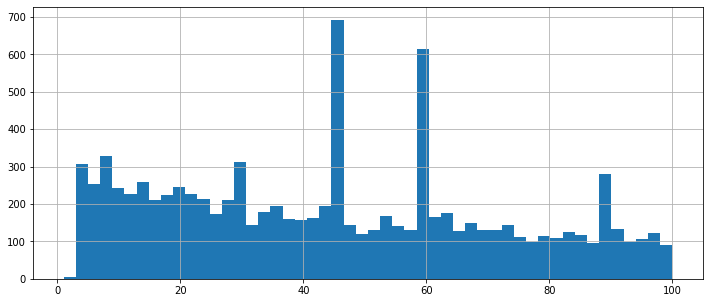

In [60]:
df.query('0 < days_exposition <= 100')['days_exposition'].hist(bins=50, figsize=(12, 5));

In [61]:
df.query('45 <= days_exposition <= 50')['rooms'].value_counts()

1    488
2    299
3    140
4     14
0     12
5      3
6      1
7      1
Name: rooms, dtype: int64

In [62]:
df.query('60 <= days_exposition <= 65')['rooms'].value_counts()

2    325
1    287
3    253
4     37
0      8
5      7
6      2
Name: rooms, dtype: int64

In [63]:
df.query('90 <= days_exposition <= 95')['rooms'].value_counts()

2     162
3     144
1     123
4      34
5      14
6       3
7       1
9       1
14      1
Name: rooms, dtype: int64

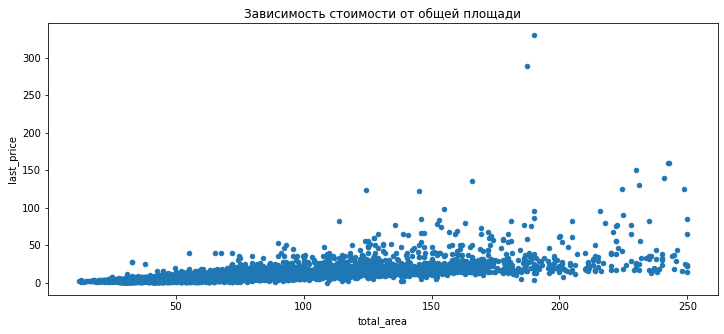

In [64]:
df.plot(x='total_area', y='last_price', kind='scatter', figsize=(12, 5), title='Зависимость стоимости от общей площади');

In [65]:
df['total_area'].corr(df['last_price'])

0.6724275936142203

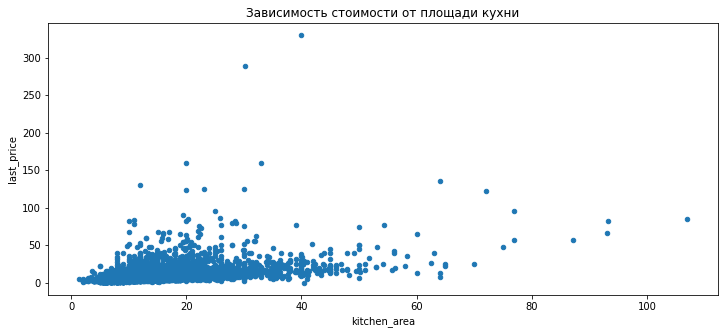

In [66]:
df.plot(x='kitchen_area', y='last_price', kind='scatter', figsize=(12, 5), title='Зависимость стоимости от площади кухни');

In [67]:
df['kitchen_area'].corr(df['last_price'])

0.5189608721611751

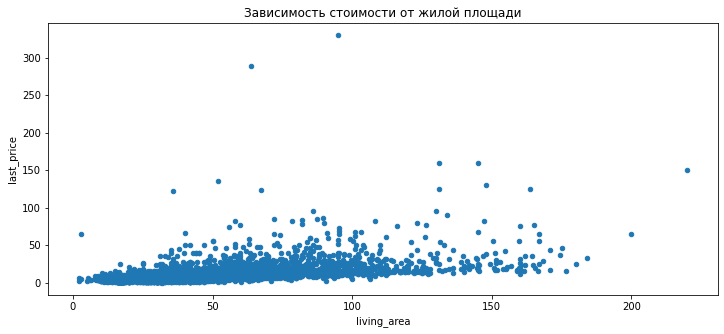

In [68]:
df.plot(x='living_area', y='last_price', kind='scatter', figsize=(12, 5), title='Зависимость стоимости от жилой площади');

In [69]:
df['living_area'].corr(df['last_price'])

0.5760696836588143

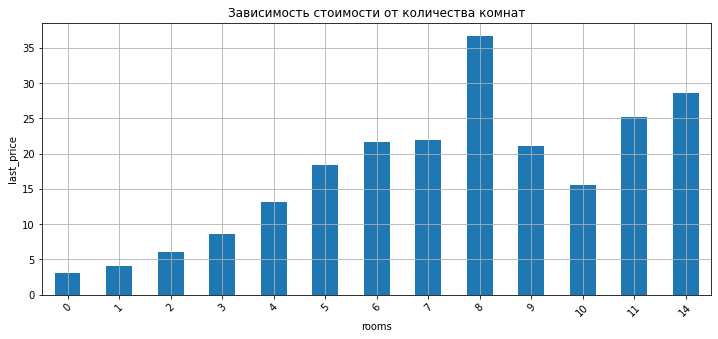

In [70]:
(df.pivot_table(index='rooms', values='last_price')
.plot(kind='bar', grid=True, legend=False, ylabel='last_price', rot=45,
      figsize=(12, 5), title='Зависимость стоимости от количества комнат'));

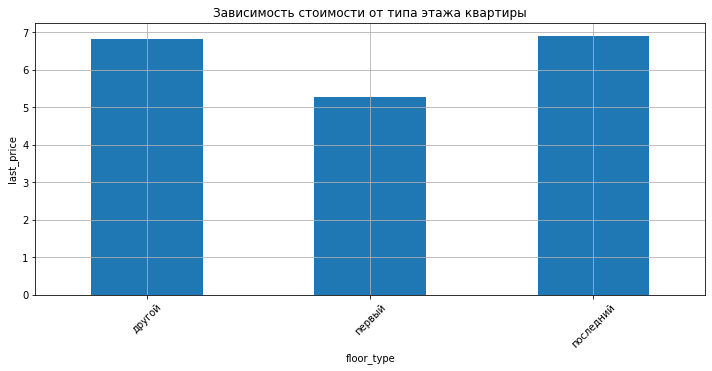

In [71]:
(df.pivot_table(index='floor_type', values='last_price')
 .plot(kind='bar', grid=True, legend=False, ylabel='last_price', rot=45,
       figsize=(12, 5), title='Зависимость стоимости от типа этажа квартиры'));

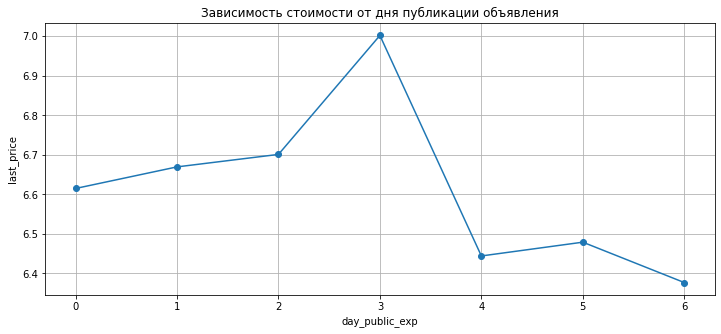

In [72]:
(df.pivot_table(index='day_public_exp', values='last_price')
 .plot(style='o-', grid=True, legend=False, ylabel='last_price',
       figsize=(12, 5), title='Зависимость стоимости от дня публикации объявления'));

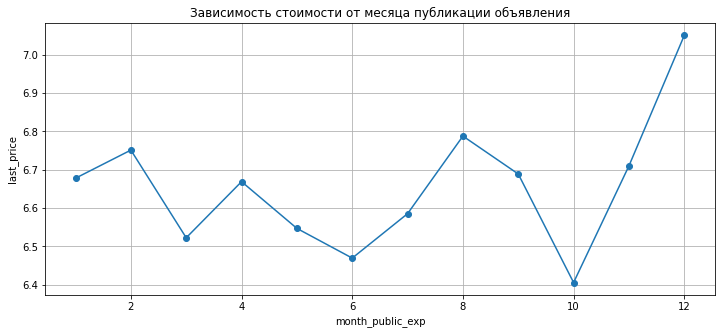

In [73]:
(df.pivot_table(index='month_public_exp', values='last_price')
 .plot(style='o-', grid=True, legend=False, ylabel='last_price',
       figsize=(12, 5), title='Зависимость стоимости от месяца публикации объявления'));

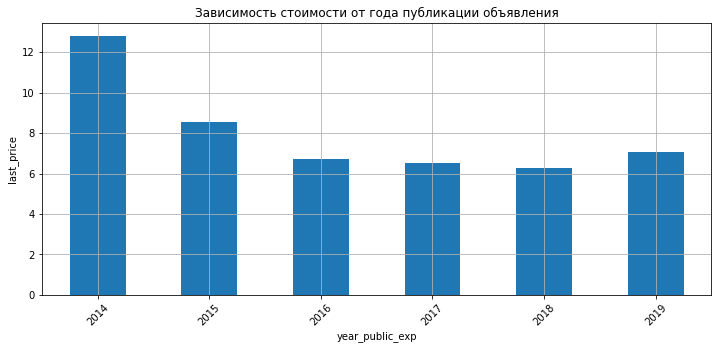

In [74]:
(df.pivot_table(index='year_public_exp', values='last_price')
 .plot(kind='bar', grid=True, legend=False, ylabel='last_price', rot=45,
       figsize=(12, 5), title='Зависимость стоимости от года публикации объявления'));

Средняя цена за квадратный метр в 10 населенных пунктах с наибольшим количеством объявлений.

In [75]:
most_popular = df['locality_only_name'].value_counts().head(10)

(df.query('locality_only_name in @most_popular.index')
 .pivot_table(index='locality_only_name', values=['price_per_meter', 'cityCenters_nearest_km'])
 .sort_values(by='price_per_meter', ascending=False))

,cityCenters_nearest_km,price_per_meter
locality_only_name,,
Санкт-Петербург,11.635129,113953.501442
Пушкин,28.762295,103130.851744
Кудрово,NaN,95326.179139
Парголово,19.948012,90175.913458
Мурино,22.000000,86087.512050
Шушары,24.204128,78677.364217
Колпино,32.032738,75333.295801
Гатчина,NaN,68746.146763
Всеволожск,NaN,68719.320400


Цена одного километра в Санкт-Петербурге.

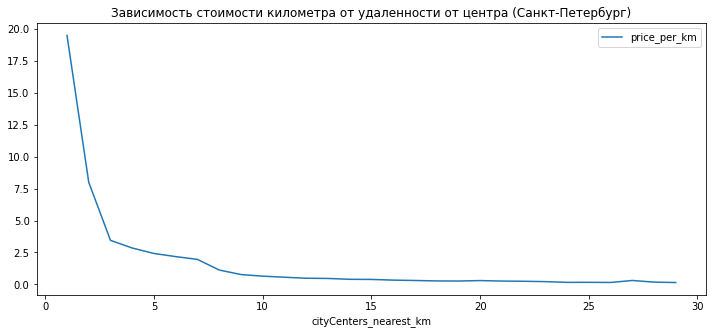

In [76]:
spb = df.query('locality_only_name == "Санкт-Петербург"')[['last_price', 'cityCenters_nearest_km']]
spb['price_per_km'] = spb['last_price'] / spb['cityCenters_nearest_km']

(spb.pivot_table(index='cityCenters_nearest_km', values='price_per_km')
 .plot(figsize=(12, 5), title='Зависимость стоимости километра от удаленности от центра (Санкт-Петербург)'));

График имеет выраженную экспоненциальную зависимость и подтверждает тот факт, что чем ближе к центру города расположена квартира, тем больше будет ее стоимость.

### Общий вывод

- Стоимость квартиры напрямую зависит от ее площади. Чем больше площадь, тем выше стоимость. Зависимость является максимально приближенной к прямой (коэффициент корреляции равен 0.67). Имеются выбросы с завышенной стоимостью, но их немного.

- Зависимость стоимости квартиры от жилой площади и площади кухни является слабо выраженной, о чем соответствуют коэффициенты корреляции 0.58 и 0.52 соответственно.

- Наибольшую стоимость имеют квартиры с количеством комнат, равным 8. График в значениях до 8 имеет экспоненциальную зависимость. После этого значения наблюдается линейный спад до количества комнат 10, затем такой же линейный подъем стоимости.

- Стоимость квартиры очень слабо зависит от этажа, на котором она расположена и их средняя цена примерно одинакова. Хотя на первом этаже стоимость квартиры в среднем ниже.

- Наибольшую цену за квартиру предлагают в четверг. Наименьшую - в пятницу, субботу и воскресенье. В остальные дни недели цена примерно одинакова.

- Наименьшая средняя цена за квартиру зафиксирована в октябре и составила 6.4 млн. Наибольшая - в декабре (более 7 млн). В остальные месяцы цена колеблется в пределах 6.6 млн (от 6.4 до 6.8 млн).

- Наибольшая стоимость квартиры была в 2014 году и составила в среднем 13 млн. До 2018 года наблюдался спад цены до 6 млн. После 2018 года снова произошел рост стоимости.

- Самая высокая стоимость квадратного метра наблюдается в Санкт-Петербурге и составляет более 110000 за 1 квадратный метр. С увеличением расстояния от города этот показатель падает. Однако, можно заметить, что зависимость нелинейная. Вероятнее всего, это связано с туристическими маршрутами.

- Теория о том, что чем ближе к центру города расположена квартира, тем больше она стоит, подтверждается (изменение с 20 млн в центре города до 1.5 млн на расстоянии 10 км).